# Data Preparation


In [1]:
# --------------------------------------------------------------------------------------------------------
# populationProject.ipynb -- data preparation, inspection, and visualization 
# --------------------------------------------------------------------------------------------------------
# 0.01|02.01.22|AB|creation
# --------------------------------------------------------------------------------------------------------

# initialize

import numpy as np
import pandas as pd
#import glob
#import os
import matplotlib.pyplot as plt

#from datetime import datetime, date 
import re # regular expression
#import warnings

import seaborn as sns

# %matplotlib inline
# %matplotlib notebook

PATH_DATA = r'../../data/'
INTERACTIVE = False
VALUE_COLNAME = 'nPopulation'  # name for new column containing value of timeseries

if INTERACTIVE:
    %matplotlib notebook
else:
    %matplotlib inline
    

## Population projected

_Population projections show how the population size and structure would change if the assumptions made regarding fertility, mortality and migration remained true over the whole projection period. Even though they are hypothetical ‘what-if’ exercises, population projections help the public, statisticians and policymakers understand population dynamics. Population refers to 1st January population for the respective years._

- information about data availabilty
https://ec.europa.eu/eurostat/web/main/data/database?p_p_id=NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_nPqeVbPXRmWQ&p_p_lifecycle=0&p_p_state=pop_up&p_p_mode=view&_NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_nPqeVbPXRmWQ_nodeInfoService=true&nodeId=-9012

- meta data: N/A
Last data update: 	 08/02/2021 23:00     
Overall data coverage: 	2019 — 2100
Source data set: https://ec.europa.eu/eurostat/databrowser/product/view/PROJ_19NP

special cases: ":" missing;
two sets: agedef = COMPLET (age in completed years) and REACH (age reached during the year), resp.

Missing values are indicated by a colon. 
Numbers may be accompanied by a 1- or 2-letter code with the following meaning:

- b: break in time series
- bp: break in time series, provisional
- p: provisional
- e: estimated
- ep: estimated, provisional

For the purpose of this study, this information is ignored and hence the characters removed, facilitating conversion of the data to numeric.
- NO languages, no source country

In [2]:
fileName = PATH_DATA + 'tps00002.tsv'
# header = 1st line; missing value indicated by colon (followed by a space)
data = pd.read_csv(fileName, sep='\t', na_values=[': '], header=0) 

In [3]:
data

,"projection,unit,sex,age,geo\time",2019,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,"BSL,PER,F,TOTAL,AT",4501742,4525366,4651429,4723790,4751156,4716644,4680090,4666023,4652400,4658925
1,"BSL,PER,F,TOTAL,BE",5810693,5834299,5951166,6026313,6046029,6012730,5992062,5988884,5982881,5989523
2,"BSL,PER,F,TOTAL,BG",3604338,3580790,3326907,3092349,2892307,2717964,2561134,2444455,2387349,2380965
3,"BSL,PER,F,TOTAL,CH",4307406,4326343,4577736,4817287,5033318,5218453,5404238,5612191,5832563,6078304
4,"BSL,PER,F,TOTAL,CY",448068,453106,495813,525302,545595,562622,576617,583031,583116,583171
...,...,...,...,...,...,...,...,...,...,...,...
94,"BSL,PER,T,TOTAL,PT",10276617,10291457,10089138,9786632,9375347,8910843,8481486,8193261,8050731,7980639
95,"BSL,PER,T,TOTAL,RO",19414458,19281118,17808000,16576187,15502837,14540962,13688060,13110335,12838968,12780621
96,"BSL,PER,T,TOTAL,SE",10230185,10322613,11099033,11693373,12254064,12708255,13065090,13352899,13528669,13659849
97,"BSL,PER,T,TOTAL,SI",2080908,2095314,2106316,2081622,2043751,1989404,1938253,1902751,1889004,1888364


First column defines content of time series. 
First part is always "BSL,PER,F,TOTAL," and may be ignored; second part is either 2-letter country code or a longer code of a group of countries; only the single countries are kept.

In [4]:
# filter rows of single countries
pattern = "BSL,PER,F,TOTAL,[A-Z]{2}"  # "BSL,PER,F,TOTAL,<2-digit country code>"
colName = data.columns[0] 
data = data[data[colName].str.fullmatch(pattern)]
data

,"projection,unit,sex,age,geo\time",2019,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,"BSL,PER,F,TOTAL,AT",4501742,4525366,4651429,4723790,4751156,4716644,4680090,4666023,4652400,4658925
1,"BSL,PER,F,TOTAL,BE",5810693,5834299,5951166,6026313,6046029,6012730,5992062,5988884,5982881,5989523
2,"BSL,PER,F,TOTAL,BG",3604338,3580790,3326907,3092349,2892307,2717964,2561134,2444455,2387349,2380965
3,"BSL,PER,F,TOTAL,CH",4307406,4326343,4577736,4817287,5033318,5218453,5404238,5612191,5832563,6078304
4,"BSL,PER,F,TOTAL,CY",448068,453106,495813,525302,545595,562622,576617,583031,583116,583171
5,"BSL,PER,F,TOTAL,CZ",5405606,5420546,5422777,5328435,5256737,5192196,5085303,5013765,5018547,5072050
6,"BSL,PER,F,TOTAL,DE",42052522,42116527,42349677,42289904,42092941,41610779,41440080,41581253,41770912,42150384
7,"BSL,PER,F,TOTAL,DK",2917008,2919618,2993824,3039441,3058278,3068805,3081411,3105618,3122038,3135862
9,"BSL,PER,F,TOTAL,EE",699185,700062,679042,657493,637884,617527,599940,585416,575571,573726
10,"BSL,PER,F,TOTAL,EL",5516306,5496181,5271878,5055604,4818115,4541853,4281661,4112522,4044546,4024402


In [5]:
# transform first column (keep only last two characters (country code) -> new first column 'country'
data.insert(0, 'country', data.iloc[ : , 0].apply(lambda s: s[-2: ])) 
data

,country,"projection,unit,sex,age,geo\time",2019,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,AT,"BSL,PER,F,TOTAL,AT",4501742,4525366,4651429,4723790,4751156,4716644,4680090,4666023,4652400,4658925
1,BE,"BSL,PER,F,TOTAL,BE",5810693,5834299,5951166,6026313,6046029,6012730,5992062,5988884,5982881,5989523
2,BG,"BSL,PER,F,TOTAL,BG",3604338,3580790,3326907,3092349,2892307,2717964,2561134,2444455,2387349,2380965
3,CH,"BSL,PER,F,TOTAL,CH",4307406,4326343,4577736,4817287,5033318,5218453,5404238,5612191,5832563,6078304
4,CY,"BSL,PER,F,TOTAL,CY",448068,453106,495813,525302,545595,562622,576617,583031,583116,583171
5,CZ,"BSL,PER,F,TOTAL,CZ",5405606,5420546,5422777,5328435,5256737,5192196,5085303,5013765,5018547,5072050
6,DE,"BSL,PER,F,TOTAL,DE",42052522,42116527,42349677,42289904,42092941,41610779,41440080,41581253,41770912,42150384
7,DK,"BSL,PER,F,TOTAL,DK",2917008,2919618,2993824,3039441,3058278,3068805,3081411,3105618,3122038,3135862
9,EE,"BSL,PER,F,TOTAL,EE",699185,700062,679042,657493,637884,617527,599940,585416,575571,573726
10,EL,"BSL,PER,F,TOTAL,EL",5516306,5496181,5271878,5055604,4818115,4541853,4281661,4112522,4044546,4024402


In [6]:
# drop second column
colName = data.columns[1] 
data.pop(colName)
data

,country,2019,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,AT,4501742,4525366,4651429,4723790,4751156,4716644,4680090,4666023,4652400,4658925
1,BE,5810693,5834299,5951166,6026313,6046029,6012730,5992062,5988884,5982881,5989523
2,BG,3604338,3580790,3326907,3092349,2892307,2717964,2561134,2444455,2387349,2380965
3,CH,4307406,4326343,4577736,4817287,5033318,5218453,5404238,5612191,5832563,6078304
4,CY,448068,453106,495813,525302,545595,562622,576617,583031,583116,583171
5,CZ,5405606,5420546,5422777,5328435,5256737,5192196,5085303,5013765,5018547,5072050
6,DE,42052522,42116527,42349677,42289904,42092941,41610779,41440080,41581253,41770912,42150384
7,DK,2917008,2919618,2993824,3039441,3058278,3068805,3081411,3105618,3122038,3135862
9,EE,699185,700062,679042,657493,637884,617527,599940,585416,575571,573726
10,EL,5516306,5496181,5271878,5055604,4818115,4541853,4281661,4112522,4044546,4024402


In [19]:
2019, *range(2020,2101,10) 

(2019, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100)

In [27]:
# convert year column names to integer 
yearColumns = 2019, *range(2020,2101,10) 
newColumnNames =  "country", 2019, *range(2020,2101,10) 
#print(newColumnNames)
data.columns = newColumnNames
data

,country,2019,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,AT,4501742,4525366,4651429,4723790,4751156,4716644,4680090,4666023,4652400,4658925
1,BE,5810693,5834299,5951166,6026313,6046029,6012730,5992062,5988884,5982881,5989523
2,BG,3604338,3580790,3326907,3092349,2892307,2717964,2561134,2444455,2387349,2380965
3,CH,4307406,4326343,4577736,4817287,5033318,5218453,5404238,5612191,5832563,6078304
4,CY,448068,453106,495813,525302,545595,562622,576617,583031,583116,583171
5,CZ,5405606,5420546,5422777,5328435,5256737,5192196,5085303,5013765,5018547,5072050
6,DE,42052522,42116527,42349677,42289904,42092941,41610779,41440080,41581253,41770912,42150384
7,DK,2917008,2919618,2993824,3039441,3058278,3068805,3081411,3105618,3122038,3135862
9,EE,699185,700062,679042,657493,637884,617527,599940,585416,575571,573726
10,EL,5516306,5496181,5271878,5055604,4818115,4541853,4281661,4112522,4044546,4024402


Missing values are indicated by a colon. 
Numbers may be accompanied by a 1- or 2-letter code with the following meaning:

- b: break in time series
- bp: break in time series, provisional
- p: provisional
- e: estimated
- ep: estimated, provisional

For the purpose of this study, this information is ignored and hence the characters removed, facilitating conversion of the data to numeric.

In [25]:
# -- cleanse data
# data.replace("[a-z]+", "", regex=True, inplace=True) # warning (could be ignored)
data = data.replace("[a-z]+", "", regex=True, inplace=False) # alternative

# -- missing values
print("Count missing values per year:")
print(data.isna().sum())

Count missing values per year:
country    0
2019       0
2020       0
2030       0
2040       0
2050       0
2060       0
2070       0
2080       0
2090       0
2100       0
dtype: int64


In [26]:
data.dtypes # all object
# -> convert all year columns of DataFrame to numeric (and ignore errors caused by country)
data = data.apply(pd.to_numeric, errors='ignore')
# imputation: linear
data = data.interpolate(method = 'linear', limit_direction = 'both', axis = 0)

In [28]:
# year columns become attribute (pivoting wide to long -> melt())
# key is country (for each year and country, a row is to be created)
# use the year columns for the value column 
data = data.melt(['country'], value_vars = yearColumns, var_name = 'year', 
                                              value_name = VALUE_COLNAME) 

In [29]:
# -- create an index
#immigrationData.set_index(['year', 'country'], inplace = True)
data.set_index(['year'], inplace = True)

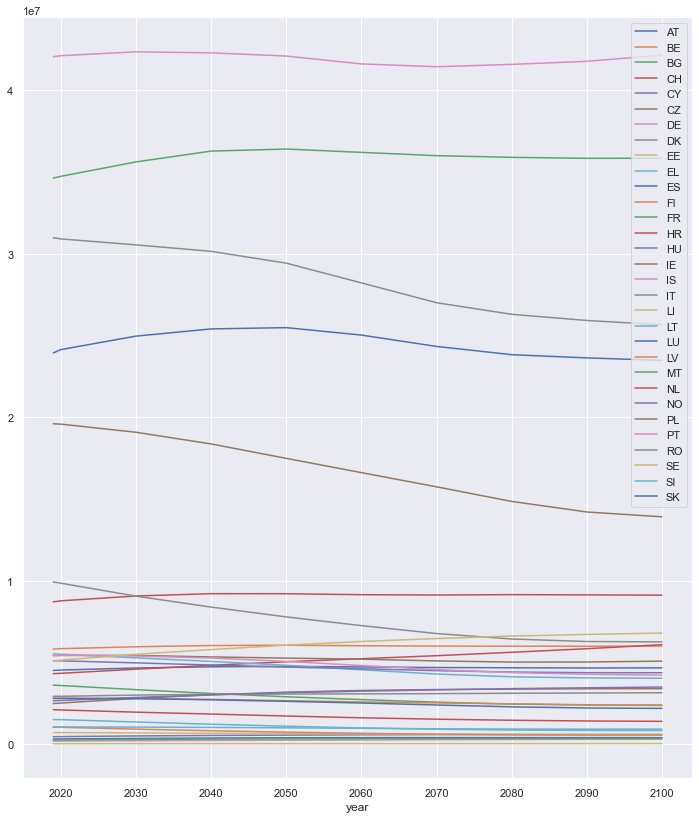

In [30]:
# -- plot timeseries ----
sns.set()
# 1 plot per country:
# _ = immigrationData.groupby('country').plot(figsize = [14,20]) 
# all countries in 1 plot:
_ = data.groupby('country')[VALUE_COLNAME].plot(figsize = [12,14], legend=True) 

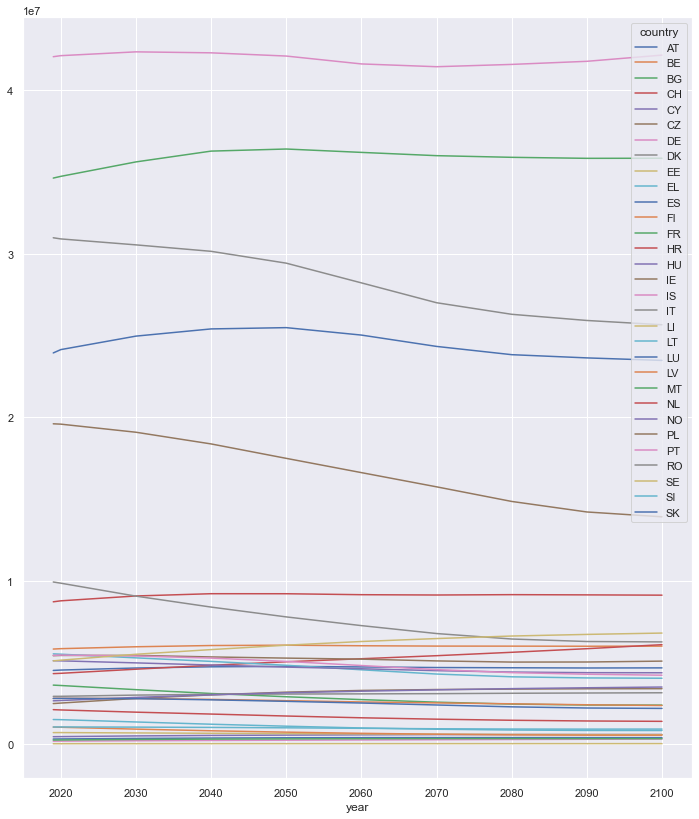

In [31]:
# alternative: 1 col/country
_= data.pivot(columns='country', values=VALUE_COLNAME).plot(figsize = [12,14])

In [ ]:
if False:
    data.reset_index(inplace=True)
    data